# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2023

## Homework 9
Due Wednesday, April 5

In [19]:
using PyCall, PyPlot   # Packages needed

### Problem 1 - Data Structures and Runge 5 solver

First we will create some data structures for representing IVP problems and solutions.

#### Problem 1(a)

Define a `struct` named `IVPproblem` with the following variables and types:

* `f`, a `Function`
* `T`, a `Number`
* `y0`, a `Vector`

Define a `struct` named `IVPsolution` with the following variables and types:

* `t`, a `Vector`
* `y`, a `Matrix`

In [3]:
struct IVPproblem
    f::Function
    T::Integer
    y0::Vector
end

struct IVPsolution
    t::Vector
    y::Matrix
end

#### Problem 1(b)

Next, implement the following 5th order accurate Runge-Kutta method as a Julia function named `runge5` with the same syntax as the `rk4` function in the lecture notebook.

$$
\begin{align*}
k_1 &= h f(t_n, y_n) \\
k_2 &= h f(t_n + h/5, y_n + k_1/5) \\
k_3 &= h f(t_n + 2h/5, y_n + 2k_2/5) \\
k_4 &= h f(t_n + h, y_n + 9k_1/4 - 5k_2 + 15k_3/4) \\
k_5 &= h f(t_n + 3h/5, y_n - 63k_1/100 + 9k_2/5 - 13k_3/20 + 2k_4/25) \\
k_6 &= h f(t_n + 4h/5, y_n - 6k_1/25 + 4k_2/5 + 2k_3/15 + 8k_4/75) \\
y_{n+1} &= y_n + (17k_1 + 100k_3 + 2k_4 - 50k_5 + 75k_6) / 144
\end{align*}
$$

In [2]:
function runge5(f, y0, h, N, t0=0)
    t = t0 .+ h*(0:N)
    y = zeros(N+1, length(y0))
    
    y[1,:] .= y0
    for n = 1:N
        k1 = h * f(t[n], y[n,:])
        k2 = h * f(t[n] + h/5, y[n,:] + k1/5)
        k3 = h * f(t[n] + 2h/5, y[n,:] + 2k2/5)
        k4 = h * f(t[n] + h, y[n,:] + 9k1/4 - 5k2 + 15k3/4)
        k5 = h * f(t[n] + 3h/5, y[n,:] - 63k1/100 + 9k2/5 -13k3/20 + 2k4/25)
        k6 = h * f(t[n] + 4h/5, y[n,:] - 6k1/25 + 4k2/5 + 2k3/15 + 8k4/75)
        y[n+1,:] = y[n,:] + (17k1 + 100k3 + 2k4 - 50k5 + 75k6)/144
    end
    
    return t,y
end

runge5 (generic function with 3 methods)

#### Problem 1(c)

Implement a function `runge5(ivp, N)` where `ivp` is of type `IVPproblem` and `N` is the
number of timesteps. The function should return the solution as a type `IVPsolution`.
Do not rewrite any code from before, but simply call the previous function.

In [51]:
function runge5(ivp::IVPproblem, N)
    t,y = runge5(ivp.f, ivp.y0, ivp.T, N)
    return IVPsolution(t, y)
end

runge5 (generic function with 4 methods)

#### Problem 1(d)

* Create an `IVPproblem` for the differential equation $f(t,y)=-y$, $T=1$, $y(0)=1$.
* Solve using `runge5` with $N=10$ to obtain an `IVPsolution`
* Compute and show the differences between the computed solution and the true solution

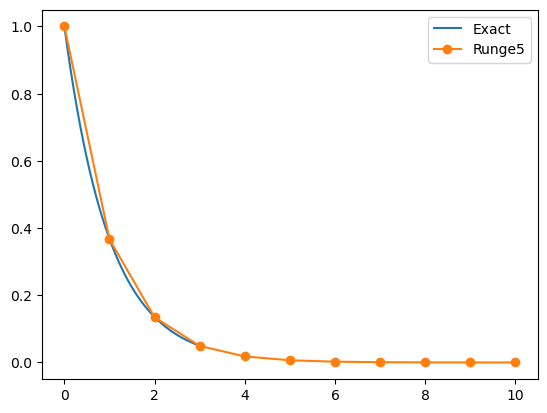

PyObject <matplotlib.legend.Legend object at 0x7f760238da00>

In [50]:
yexact(t) = exp(-t)
tt = 0:0.01:3
plot(tt, yexact.(tt))
f(t, y) = -y
T = 1
y0 = [1]
prob = IVPproblem(f, T, y0)
sol = runge5(prob, 10)
plot(sol.t, sol.y, "-o")
legend(("Exact", "Runge5"))

### Problem 2 - Double pendulum

Next we will study the evolution of a double pendulum.
The state of the configuration at time $t$ is given by the angles
$\theta_1(t)$ and $\theta_2(t)$, see figure below.

<div>
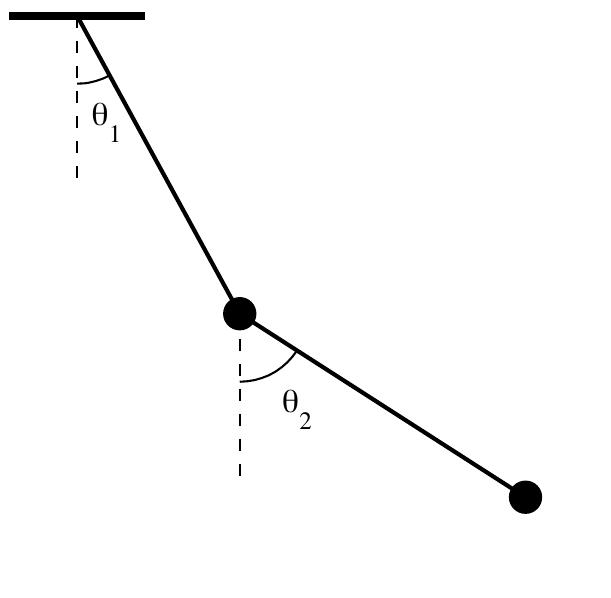
</div>

Assuming that the lengths of the bars are 1, the masses at the end of
the bars are 1, and that the constant of gravity is 1, the equations
of motion for the double pendulum can be written:

$$
\begin{align}
\theta_1''&=\frac{-3\sin\theta_1-\sin(\theta_1-2\theta_2)
-2\sin(\theta_1-\theta_2)\cdot(\theta_2'^2+\theta_1'^2\cos(\theta_1-\theta_2))}
{3-\cos(2\theta_1-2\theta_2)} \label{ode1} \\ 
\theta_2''&=\frac{2\sin(\theta_1-\theta_2)(2\theta_1'^2+2\cos\theta_1
+\theta_2'^2\cos(\theta_1-\theta_2))}{3-\cos(2\theta_1-2\theta_2)} \label{ode2}
\end{align}
$$

#### Problem 2(a)

Rewrite these as a system of 1st order equations by introducing the angular velocities $\omega_1=\theta_1'$ and
$\omega_2=\theta_2'$. The current state of the pendulum can then be described by the vector
$y=(\theta_1,\theta_2,\omega_1,\omega_2)$, and the 1st order
system can be written as $y' = f(t,y)$. Write a Julia function `fpend(t,y)` which evalutes this function.

$$
\begin{align}
\omega_1'&=\frac{-3\sin\theta_1-\sin(\theta_1-2\theta_2)
-2\sin(\theta_1-\theta_2)\cdot(\omega_2^2+\omega_1^2\cos(\theta_1-\theta_2))}
{3-\cos(2\theta_1-2\theta_2)} \label{ode1} \\ 
\omega_2'&=\frac{2\sin(\theta_1-\theta_2)(2\omega_1^2+2\cos\theta_1
+\omega_2^2\cos(\theta_1-\theta_2))}{3-\cos(2\theta_1-2\theta_2)} \label{ode2}
\end{align}
$$

In [28]:
function fpend(t, y)
    𝜃1, 𝜃2, 𝜔1, 𝜔2 = y
    𝜔1prime = ((-3 * sin(𝜃1)) - sin(𝜃1 - 2𝜃2) - 2sin(𝜃1 - 𝜃2) * ((𝜔2)^2 + ((𝜔1)^2)cos(𝜃1 - 𝜃2)))/(3-cos(2𝜃1 - 2𝜃2))
    𝜔2prime = (2sin(𝜃1 - 𝜃2)*(2*((𝜔1)^2) + 2cos(𝜃1) + (((𝜔2)^2)*cos(𝜃1 - 𝜃2))))/(3-cos(2𝜃1 - 2𝜃2))
    return [𝜔1, 𝜔2, 𝜔1prime, 𝜔2prime]
end

fpend (generic function with 1 method)

#### Problem 2(b)

* Create an `IVPproblem` for the double pendulum problem, for the initial
condition $\theta_1 = \theta_2 = 2$, $\omega_1=0$, $\omega_2=-1$ and the final time $T=100$.

* Create an `IVPsolution` by solving using `runge5` and $N=500$.

* Plot the solution vs time (all four components $\theta_1(t)$, $\theta_2(t)$, $\omega_1(t)$, $\omega_2(t)$).

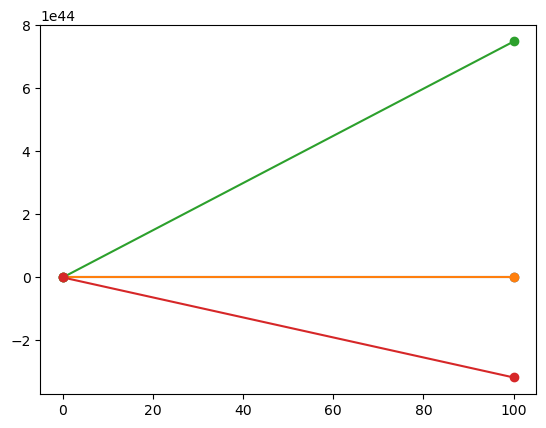

4-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f764c19e130>
 PyObject <matplotlib.lines.Line2D object at 0x7f764c19e220>
 PyObject <matplotlib.lines.Line2D object at 0x7f764c19e340>
 PyObject <matplotlib.lines.Line2D object at 0x7f764c19e460>

In [35]:
𝜃1=𝜃2=2
𝜔1=0
𝜔2=-1
y0=[𝜃1, 𝜃2, 𝜔1, 𝜔2]
T = 100
N=500
prob = IVPproblem(fpend, T, y0)
sol = runge5(prob, N)
t = sol.t[:100]
y = sol.y[:100]
plot(sol.t, sol.y, "-o")

#### Animation (optional)

If you want to, run the cell below to create a movie of the evolving double pendulum and show it inside the notebook. It looks pretty cool, and can be quite useful for debugging your code.

To create the animation, call the function `anim` below with your `IVPsolution` as the only argument.

In [ ]:
@pyimport IPython.display as d
function anim(sol::IVPsolution)
    animation = pyimport("matplotlib.animation");
    fig, ax = subplots(figsize=(5,5))
    function update(frame)
        θ1 = sol.y[frame+1,1]
        θ2 = sol.y[frame+1,2]
        p1 = [sin(θ1),-cos(θ1)]
        p2 = p1 .+ [sin(θ2),-cos(θ2)]
        ax.clear()
        ax.plot([0,p1[1],p2[1]], [0,p1[2],p2[2]], linewidth=2)
        ax.add_artist(matplotlib.patches.Circle(p1, 0.1))
        ax.add_artist(matplotlib.patches.Circle(p2, 0.1))
        ax.set_xlim([-2.5,2.5])
        ax.set_ylim([-2.5,2.5])
    end

    ani = animation.FuncAnimation(fig, update, frames=length(sol.t), interval=50)
    close(ani._fig)
    d.HTML(ani.to_jshtml())
end